[0, 1.995, 3.415, 4.58, 5.45, 6.285, 7.06, 7.75, 8.36, 8.94, 9.47, 10.075, 10.58, 11.095, 11.575, 12.045, 12.515, 12.965, 13.365, 13.85, 14.205, 14.585, 14.9, 15.365, 15.725, 16.06, 16.41, 16.74, 17.13, 17.49, 17.805, 18.155, 18.495, 18.73, 19.0, 19.265, 19.615, 19.92, 20.135, 20.45, 20.705, 21.025, 21.305, 21.545, 21.77, 22.04, 22.29, 22.575, 22.77, 23.1, 23.325, 23.575, 23.845, 24.02, 24.265, 24.475, 24.685, 24.985, 25.24, 25.42, 25.6, 25.94, 26.205, 26.46, 26.63, 26.845, 27.02, 27.23, 27.43, 27.64, 27.815, 28.0, 28.2, 28.39, 28.545, 28.665, 28.845, 29.105, 29.435, 29.605, 29.81, 29.95, 30.12, 30.315, 30.45, 30.71, 30.93, 31.08, 31.23, 31.395, 31.615, 31.795, 32.0, 32.165, 32.405, 32.565, 32.735, 32.925, 33.08, 33.225, 33.415, 33.555, 33.75, 34.005, 34.195, 34.385, 34.58, 34.755, 34.9, 35.09, 35.26, 35.45, 35.65, 35.79, 35.9, 35.98, 36.16, 36.305, 36.49, 36.66, 36.815, 37.035, 37.19, 37.35, 37.52, 37.65, 37.77, 37.985, 38.185, 38.34, 38.445, 38.555, 38.67, 38.875, 39.065, 39.265, 39.

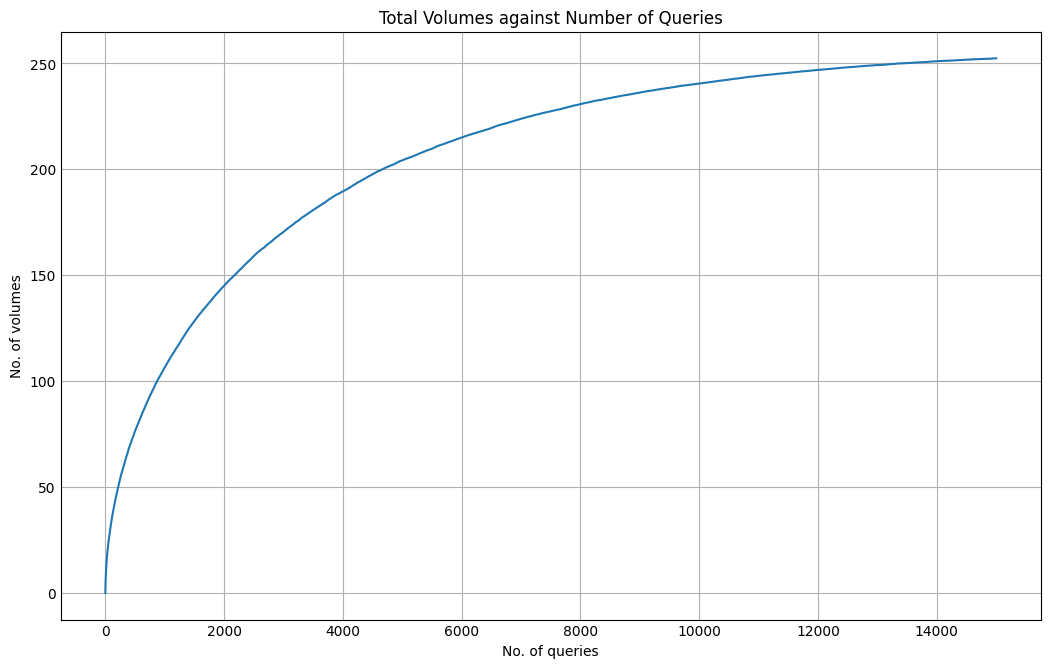

In [14]:
import math 
import random 
import matplotlib.pyplot as plt 

RSEmax = 256

def is_power_of_two(x):
    return (x & (x - 1)) == 0

def overcover(start, end):
    diff = (end - start) - 1
    while True:
        diff += 1
        if is_power_of_two(diff + 1):  # Check if diff + 1 is a power of 2
            N = math.log(diff + 1, 2)
            break
    if start == end:
        return (start, end)
    elif start == end - 1:
        return (start, end)
    else:
        for i in range(int(N), int(math.log(RSEmax, 2)) + 1):  # Ensure N is an integer
            for j in range(0, start):
                if (start - j) % 2**(i-1) == 1:
                    if start - j + 2**i - 1 >= end:
                        return (start - j, start - j + 2**i - 1)
                    else:
                        break

def query_gen():
    query_range_list = []
    for i in range (RSEmax):
        for j in range (i+1):
            query_range_list.append(j)
    no_range = random.choice(query_range_list)

    first_int = random.randint(1, RSEmax-no_range)
    query = (first_int, first_int+no_range)
    return(query)

a = 1
b = 2
for i in range(int(math.log(RSEmax, 2))-2):
    a = 2*a + b
    b += 1

max_volumes = RSEmax*2-1 + a
no_of_runs = 200
no_of_queries = 15000
def augovercover_query(no_of_runs, no_of_queries):
    arr = [0 for i in range(no_of_queries+1)]
    for h in range(no_of_runs):
        vol_tracker = []
        vol_sum = 0
        query_tracker = []
        for j in range(no_of_queries):
            query_asked = query_gen()
            if len(vol_tracker) == max_volumes: 
                for i in range(max_volumes, no_of_queries):
                    arr[i+1] = max_volumes*no_of_runs
                break   
            if len(query_tracker) == int((RSEmax*(RSEmax + 1))/2):
                break   
            while query_asked in query_tracker:
                query_asked = query_gen()
            else:
                query_tracker.append(query_asked)
                (a,b) = query_asked
                query_list = overcover(a,b)
                for i in query_list:
                    if i not in vol_tracker:
                        vol_tracker.append(i)
                        vol_sum +=1
                arr[j+1] = arr[j+1] + vol_sum
                
    for i in range(no_of_queries):
        arr[i+1] = arr[i+1] /no_of_runs
    print(arr)
    return(arr)

arr = augovercover_query(no_of_runs,no_of_queries) 

plt.style.use('_mpl-gallery')
plt.figure(figsize=(10,6))
plt.plot(arr)
plt.xlabel("No. of queries")  
plt.ylabel("No. of volumes")  
plt.title("Total Volumes against Number of Queries")  
plt.show()